In [72]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [73]:
UNSUPERVISED = 'new_dataset_fix.xlsx'
df = pd.read_excel(UNSUPERVISED)

In [74]:
kolom_numerik = [
    'Kunjungan PerMinggu',
    'Waktu Rata-Rata Situs(menit)',
    'Produk Dilihat'
]

In [75]:
for kolom in kolom_numerik:
    df[kolom] = df[kolom].replace(',' '.', regex=True).astype(float)

In [76]:
skaler = StandardScaler()
data_distandarkan = skaler.fit_transform(df[kolom_numerik])

In [77]:
KMeans = KMeans(n_clusters=2, random_state=42)
KMeans.fit(data_distandarkan)
df['cluster'] = KMeans.labels_

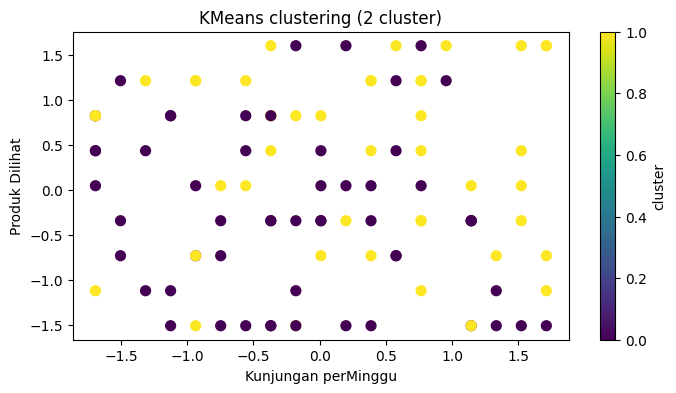

   Kunjungan PerMinggu  Waktu Rata-Rata Situs(menit)  Produk Dilihat  cluster
0                  6.0                          11.0             1.0        0
1                 12.0                          24.0             4.0        0
2                 13.0                          18.0             6.0        0
3                  9.0                           8.0             2.0        0
4                 10.0                          58.0             3.0        1


In [78]:
plt.figure(figsize=(8, 4))
plt.scatter(data_distandarkan[:, 0], data_distandarkan[:, 2], c=df['cluster'], s=50, cmap='viridis')
plt.xlabel('Kunjungan perMinggu')
plt.ylabel('Produk Dilihat')
plt.title('KMeans clustering (2 cluster)')
plt.colorbar(label='cluster')
plt.show()

df.to_excel('Hasil cluster.xlsx', index=False)
print(df.head())

In [79]:
df = pd.read_excel('Hasil cluster.xlsx', sheet_name='Sheet1')
df

,Kunjungan PerMinggu,Waktu Rata-Rata Situs(menit),Produk Dilihat,cluster
0,6,11,1,0
1,12,24,4,0
2,13,18,6,0
3,9,8,2,0
4,10,58,3,1
...,...,...,...,...
95,5,46,3,1
96,17,4,2,0
97,19,53,9,1
98,1,3,6,0


In [80]:
x = df.iloc[:, 0:3]
y = df.iloc[:, 3]

In [81]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from imblearn.over_sampling import SMOTE

In [82]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [83]:
from sklearn.preprocessing import StandardScaler

smote = SMOTE(random_state=42)
x_train, y_train = smote.fit_resample(x_train, y_train)

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [84]:
model = GaussianNB()
model.fit(x_train, y_train)

GaussianNB()

In [85]:
from sklearn.metrics import classification_report
y_pred = model.predict(x_test)

accuracy = model.score(x_test, y_test)
report = classification_report(y_test, y_pred, zero_division=1)

In [86]:
print('Accuracy: ', accuracy)
print('classification_report: \n', report)

Accuracy:  0.9
classification_report: 
               precision    recall  f1-score   support

           0       1.00      0.86      0.92        14
           1       0.75      1.00      0.86         6

    accuracy                           0.90        20
   macro avg       0.88      0.93      0.89        20
weighted avg       0.93      0.90      0.90        20



In [87]:
label_map = {1: 'produktif', 0: 'tidak_produktif', 2: 'sedang'}

In [ ]:
file_path = 'hasil prediksi naibe bayes.xlsx'
rf.to_excel(file_path, index=false)
print('Hasil prediksi berhasil disimpan di ', file_path)

NameError: name 'export' is not defined

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=42)

model.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, zero_division=1)

In [ ]:
print('Accuracy: ', accuracy)
print('classification_report:\n', report)

In [ ]:
label_map = {1: 'produktif', 0: 'tidak_produktif', 2: 'sedang'}
print(label_map)

result = pd.DataFrame(y_pred, columns=['cluster'])

file_path = 'Hasil prediksi SVM.xlsx'
result.to_excel(file_path, index=False)

print('Hasil prediksi berhasil disimpan di', file_path)

In [ ]:
from sklearn.preprocessing import StandardScaler

smote = SMOTE(random_state=42)
x_train, y_train = smote.fit_resample(x_train, y_train)

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

model = SVC(random_state=42)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
repot = classification_report(y_test, y_pred, zero_divission=1)

In [ ]:
print('Accuracy: ', accuracy)
print('classification_report:\n', report)